<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

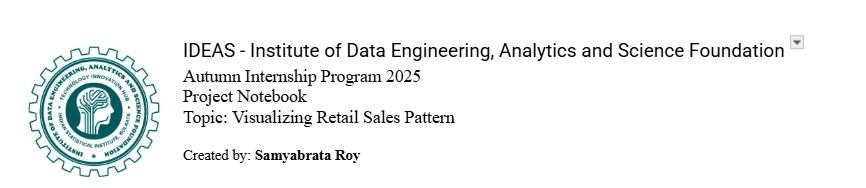

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kqDqFkMblqNBmt68clyn_CCNpdghgrE3"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

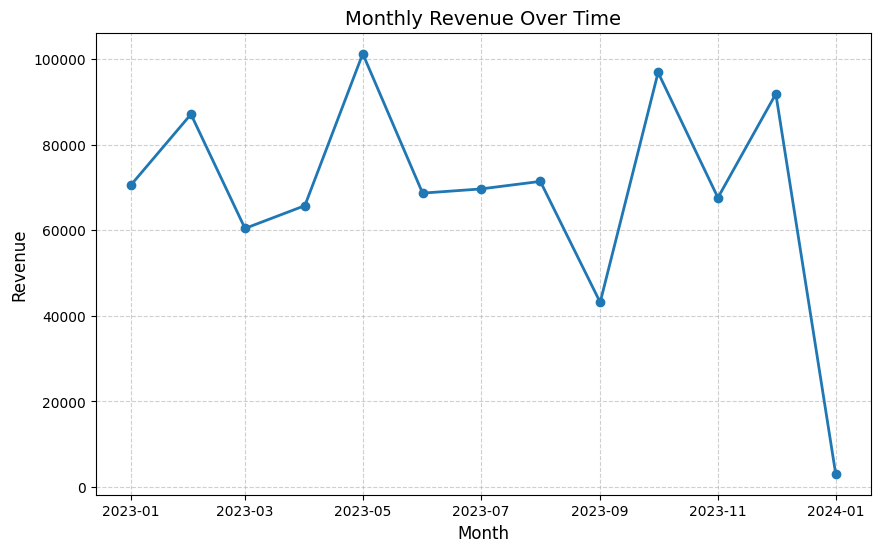

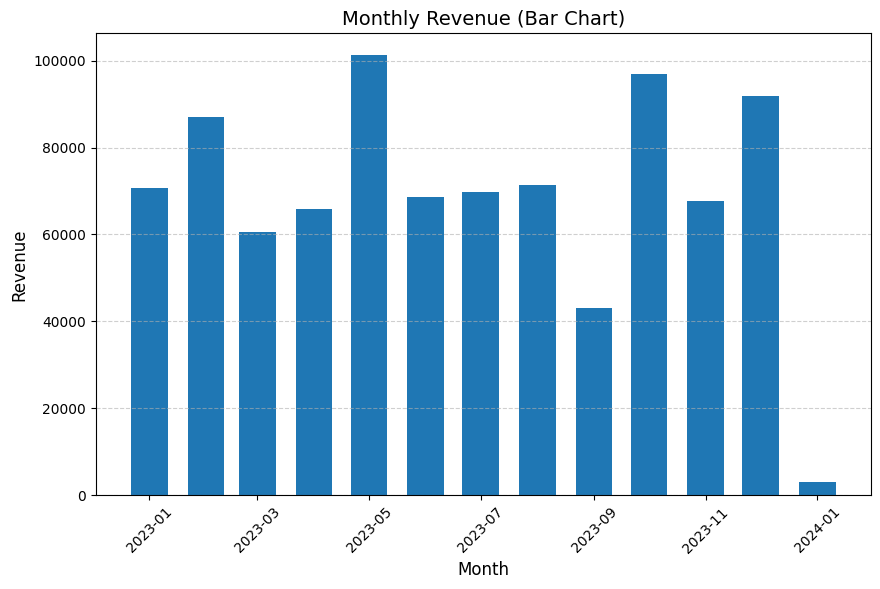

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Q. Can you interpret the above bar diagram?

Q. What are your key takeaways?



---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?




---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

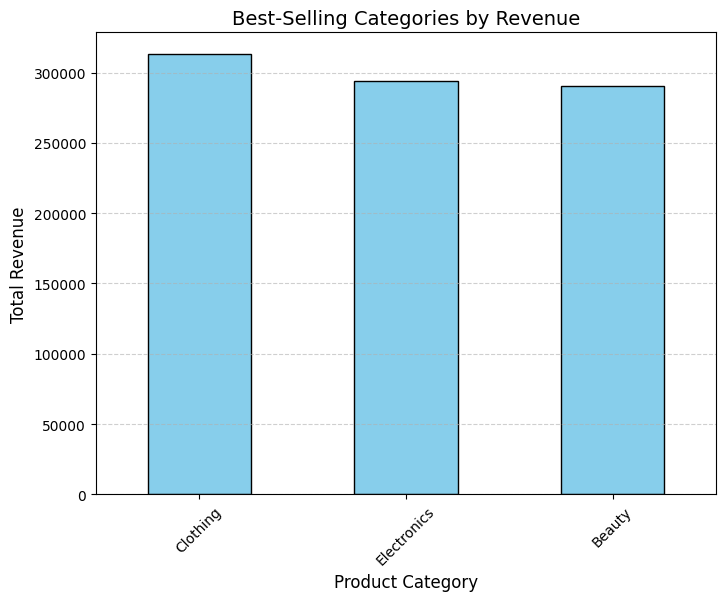

In [ ]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?



---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  



---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?



---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

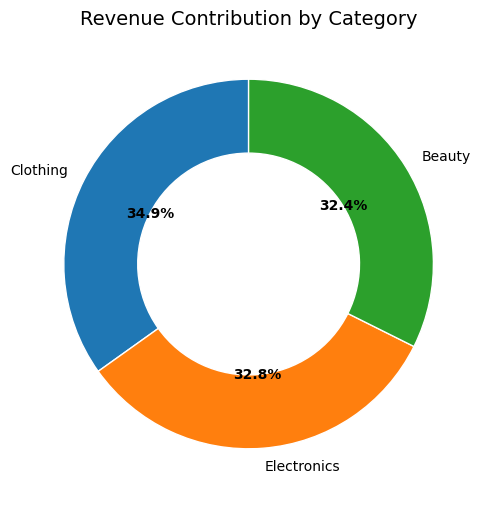

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?

Q. What else we could have come up with apart from donut chart to server the same purpose?



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?



---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.
